In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Fetching Data**

In [ ]:
hotel_details=pd.read_csv('/content/drive/MyDrive/Dataset/Hotel_details.csv' ,delimiter=',')
hotel_rooms=pd.read_csv('/content/drive/MyDrive/Dataset/Hotel_Room_attributes.csv' ,delimiter=',')

In [ ]:
hotel_details.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [ ]:
hotel_rooms.head()

,id,hotelcode,roomamenities,roomtype,ratedescription,guest no,price
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",6,199
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",6,309
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",2,398
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",4,122
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",1,189


In [ ]:
hotel_rooms.rename(columns={'guest no':'guests_no'},inplace=True)

In [ ]:
hotel_rooms.head()

,id,hotelcode,roomamenities,roomtype,ratedescription,guests_no,price
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",6,199
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",6,309
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",2,398
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",4,122
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",1,189


Data Exploration

1) General Exploring

2) Statistical Analysis

3) Issues

Analysis of both numerical and data value


In [ ]:
hotel_details.columns

Index(['id', 'hotelid', 'hotelname', 'address', 'city', 'country', 'zipcode',
       'propertytype', 'starrating', 'latitude', 'longitude', 'Source', 'url',
       'curr'],
      dtype='object')

In [ ]:
hotel_rooms.columns

Index(['id', 'hotelcode', 'roomamenities', 'roomtype', 'ratedescription',
       'guests_no', 'price'],
      dtype='object')

Numerical observatons

In [ ]:
hotel_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               165873 non-null  int64 
 1   hotelcode        165873 non-null  int64 
 2   roomamenities    161054 non-null  object
 3   roomtype         165873 non-null  object
 4   ratedescription  161054 non-null  object
 5   guests_no        165873 non-null  int64 
 6   price            165873 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 8.9+ MB


In [ ]:
hotel_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [ ]:
hotel_details.describe()

,id,hotelid,zipcode,starrating,latitude,longitude,Source
count,108048.00000,1.080480e+05,8.348600e+04,108048.000000,108048.000000,108048.000000,108048.000000
mean,100429.50000,1.196298e+06,4.814535e+04,3.186537,46.770001,8.345943,3.087461
std,31190.91528,2.096632e+06,9.635945e+04,0.665614,5.438123,9.119117,1.442162
min,46406.00000,3.100000e+01,0.000000e+00,2.000000,0.000000,-111.908966,2.000000
25%,73417.75000,9.402175e+04,9.920000e+03,3.000000,43.309794,1.442162,2.000000
50%,100429.50000,3.065795e+05,3.430000e+04,3.000000,46.686896,8.975729,2.000000
75%,127441.25000,1.066211e+06,6.311000e+04,4.000000,50.777548,13.661896,5.000000
max,154453.00000,9.061192e+06,9.545142e+06,4.000000,69.536102,34.408731,5.000000


In [ ]:
hotel_rooms.describe()

,id,hotelcode,guests_no,price
count,1.658730e+05,1.658730e+05,165873.000000,165873.000000
mean,7.175720e+07,1.170720e+06,3.500642,264.891224
std,5.508651e+06,2.142096e+06,1.707099,136.189356
min,5.064343e+07,3.100000e+01,1.000000,30.000000
25%,6.983127e+07,8.279800e+04,2.000000,146.000000
50%,7.379246e+07,1.559800e+05,4.000000,266.000000
75%,7.482301e+07,8.096640e+05,5.000000,382.000000
max,8.852818e+07,8.977298e+06,6.000000,500.000000


**Data Cleaning and Transformations**

We will reduce the data frame by taking only the columns relevent for our work

In [ ]:
del hotel_details['id']
del hotel_rooms['id']
del hotel_details['zipcode']
del hotel_details['latitude']
del hotel_details['longitude']

In [ ]:
hotel_details=hotel_details.dropna()
hotel_rooms=hotel_rooms.dropna()

In [ ]:
hotel_details.drop_duplicates(subset='hotelid', keep=False, inplace=True)

Merging both data frames based on column

In [ ]:
hotel = pd.merge(hotel_rooms,hotel_details,left_on='hotelcode', right_on='hotelid',how='inner')

In [ ]:
hotel.columns

Index(['hotelcode', 'roomamenities', 'roomtype', 'ratedescription',
       'guests_no', 'price', 'hotelid', 'hotelname', 'address', 'city',
       'country', 'propertytype', 'starrating', 'Source', 'url', 'curr'],
      dtype='object')

In [ ]:
del hotel['hotelid']
del hotel['curr']
del hotel['Source']

In [ ]:
hotel.columns

Index(['hotelcode', 'roomamenities', 'roomtype', 'ratedescription',
       'guests_no', 'price', 'hotelname', 'address', 'city', 'country',
       'propertytype', 'starrating', 'url'],
      dtype='object')

To ease the process of filtering the holtes we will merge the 2 columns,'roomamenities'&'ratedescription',into a new column description

In [ ]:
hotel['description']=hotel['roomamenities'] + hotel['ratedescription']

In [ ]:
del hotel['ratedescription']
del hotel['roomamenities']

Final features of the data frame

In [ ]:
hotel.columns

Index(['hotelcode', 'roomtype', 'guests_no', 'price', 'hotelname', 'address',
       'city', 'country', 'propertytype', 'starrating', 'url', 'description'],
      dtype='object')

In [ ]:
hotel.describe(include='all')

,hotelcode,roomtype,guests_no,price,hotelname,address,city,country,propertytype,starrating,url,description
count,1.454250e+05,145425,145425.000000,145425.000000,145425,145425,145425,145425,145425,145425.000000,145425,145425
unique,NaN,7743,NaN,NaN,7951,7877,4116,29,5,NaN,8098,32333
top,NaN,Double Room,NaN,NaN,Millennium Mayfair,Main Street,London,United Kingdom,Hotels,NaN,https://www.agoda.com/en-gb/millennium-mayfair...,Air conditioning: ;Free Wi-Fi in all rooms!: ;...
freq,NaN,7566,NaN,NaN,352,407,11387,58886,143932,NaN,352,3485
mean,1.253175e+06,NaN,3.502561,264.837009,NaN,NaN,NaN,NaN,NaN,3.440564,NaN,NaN
std,2.184205e+06,NaN,1.707571,136.207498,NaN,NaN,NaN,NaN,NaN,0.622455,NaN,NaN
min,3.100000e+01,NaN,1.000000,30.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
25%,1.080840e+05,NaN,2.000000,146.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,1.666970e+05,NaN,4.000000,266.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,1.013542e+06,NaN,5.000000,382.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN


**Observations**
* Hotel Name Millennium Mayfair has the highest frequency of entries
* There are 7951 unique hotels
* United Kingdom has majority of hotels
* Air Conditioning, Free WiFi can be used as top tier room amenities

In [ ]:
sum(hotel.duplicated())

165

**Check for duplicate values**

In [ ]:
sum(hotel.duplicated())

165

Below result shows that we have 165 duplicate values

In [ ]:
hotel_after_removing_duplicates= hotel.drop_duplicates()

In [ ]:
sum(hotel_after_removing_duplicates.duplicated())

0

**Check for missing values**

In [ ]:
hotel=hotel_after_removing_duplicates.dropna()

In [ ]:
hotel.describe()

,hotelcode,guests_no,price,starrating
count,1.452600e+05,145260.000000,145260.000000,145260.000000
mean,1.253421e+06,3.502527,264.839935,3.440438
std,2.184356e+06,1.707620,136.204235,0.622505
min,3.100000e+01,1.000000,30.000000,2.000000
25%,1.080885e+05,2.000000,146.000000,3.000000
50%,1.667970e+05,4.000000,266.000000,4.000000
75%,1.013542e+06,5.000000,382.000000,4.000000
max,8.977298e+06,6.000000,500.000000,4.000000


**Data Visualization**

* We did graphs that we think best describes the dataset
* Below graph shows the correlation heatmap between the variables

<ipython-input-62-7a484d0d2ef0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = hotel.corr(method="pearson")


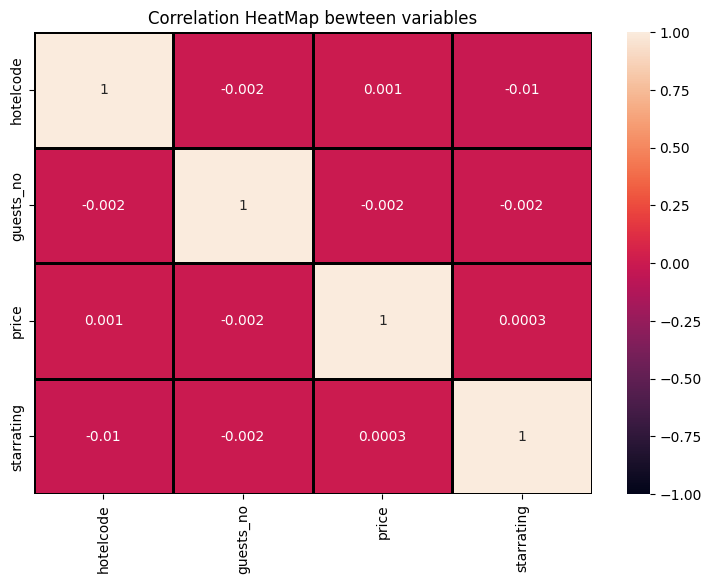

In [ ]:
corr_df = hotel.corr(method="pearson")
pyplot.figure(figsize=(9,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="rocket", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation HeatMap bewteen variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90);

Below graph shows the Correlation between Price of Hotel vs Start Rating

[Text(0.5, 1.0, 'Price vs Star Rating Correlation')]

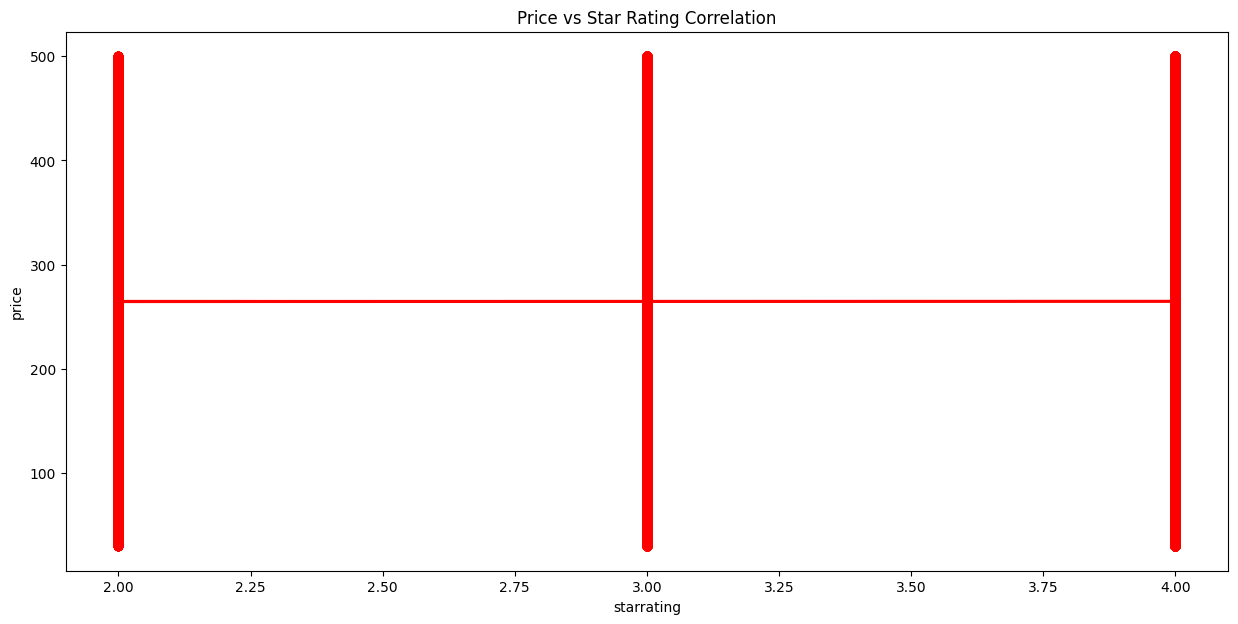

In [ ]:
pyplot.figure(figsize=(15,7))
sns.regplot(data=hotel, y="price", x="starrating", color="r").set(title="Price vs Star Rating Correlation")

Showing count of hotels having ratings 2,3 and 4

<ipython-input-64-ed9d5641cf58>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = ax,x= "starrating", data=plot,palette=colors);
<ipython-input-64-ed9d5641cf58>:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(ax = ax,x= "starrating", data=plot,palette=colors);


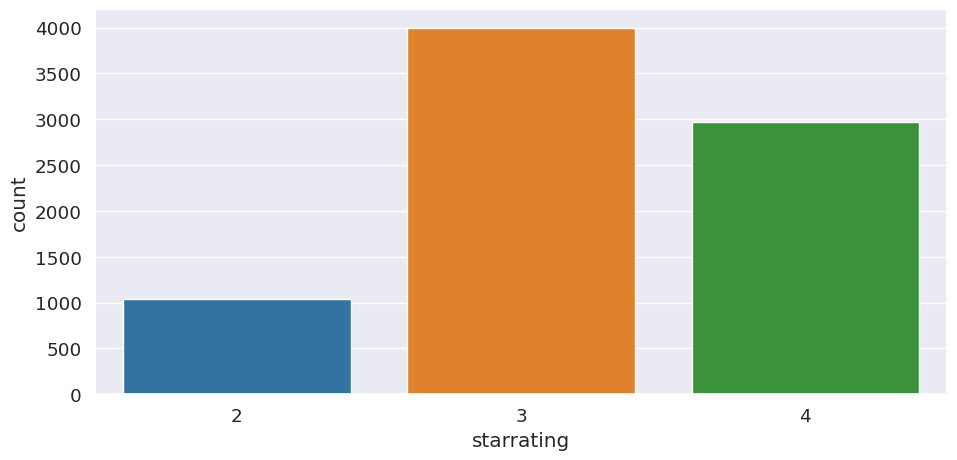

In [ ]:
plot = hotel[["hotelname","starrating"]].drop_duplicates()
sns.set(font_scale = 1.2)
a4_dims=(11,5)
colors=sns.color_palette("tab10")
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x= "starrating", data=plot,palette=colors);

**Top 10 most booked hotels**

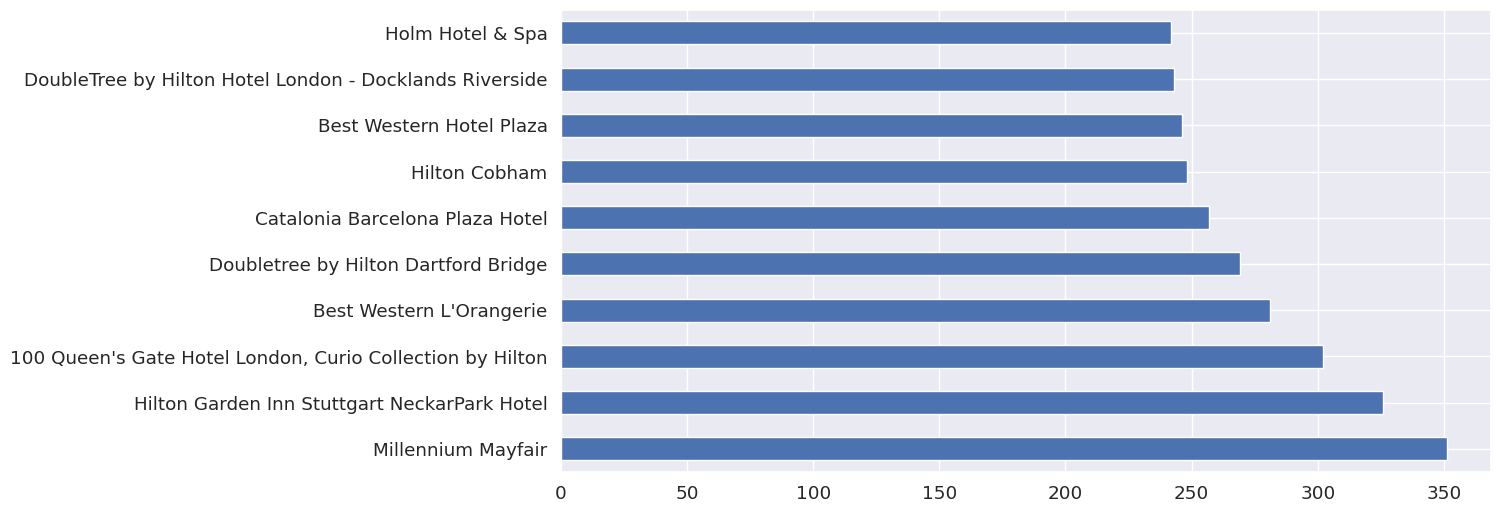

In [ ]:
Hotel_counts = hotel["hotelname"].value_counts()
Hotel_counts[:10].plot(kind='barh', figsize=(12,6));

**Top 10 cities where hotels are most booked**

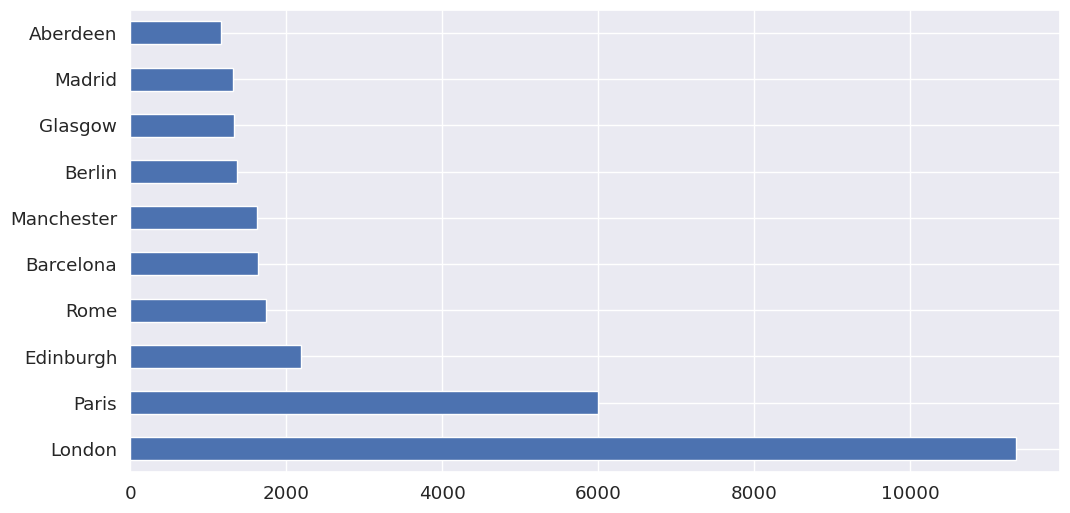

In [ ]:
Hotel_counts = hotel["city"].value_counts()
Hotel_counts[:10].plot(kind='barh', figsize=(12,6));

**Top 10 countries where hotels are most booked**

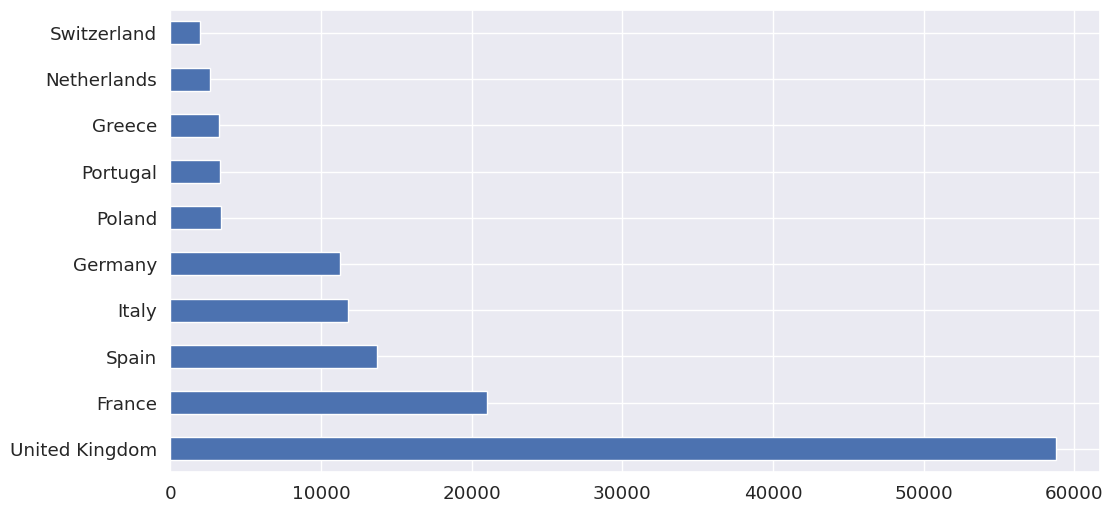

In [ ]:
Hotel_counts = hotel["country"].value_counts()
Hotel_counts[:10].plot(kind='barh', figsize=(12,6));

**Top property types preferred by users while hotel booking**

---



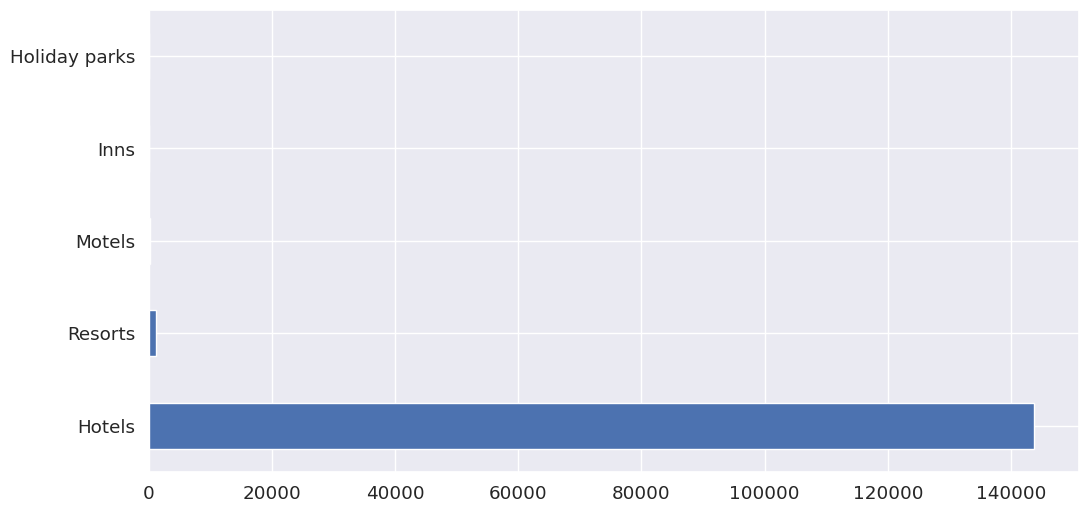

In [ ]:
Hotel_counts = hotel["propertytype"].value_counts()
Hotel_counts[:10].plot(kind='barh', figsize=(12,6));

**Graph showing count of hotels in each country**

<ipython-input-37-443dd4dd0729>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax= ax,x = "country",data=plot,palette=colors).set(title="Number of hotels in each country");
<ipython-input-37-443dd4dd0729>:7: UserWarning: 
The palette list has fewer values (10) than needed (29) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(ax= ax,x = "country",data=plot,palette=colors).set(title="Number of hotels in each country");


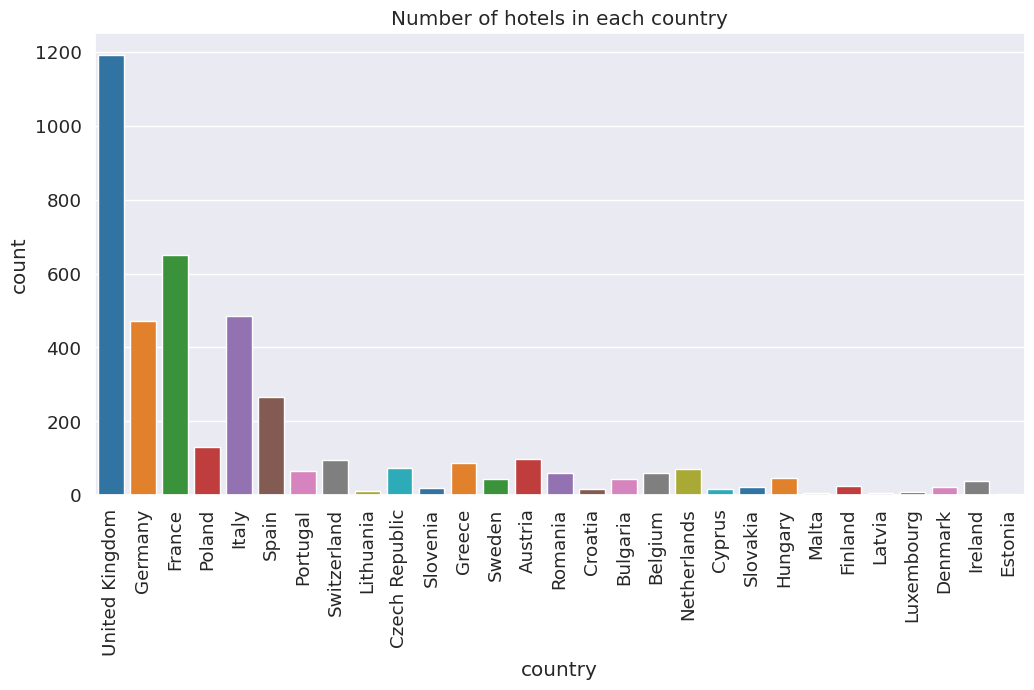

In [ ]:
plot = hotel[["city","country"]].drop_duplicates()
plot.groupby('country').count()
sns.set(font_scale = 1.2)
a4_dims=(12,6)
fig, ax=pyplot.subplots(figsize=a4_dims)
pyplot.xticks(rotation=90)
sns.countplot(ax= ax,x = "country",data=plot,palette=colors).set(title="Number of hotels in each country");

**Recommender system based only on City and ratings about the hotel**

Adding basic search function that will filter the data frame based on the location the user searches

* Base of our filter with be the star ratting for the hotels

In [ ]:
def citybased(city):
  hotel['city']=hotel['city'].str.lower()
  citybase=hotel[hotel['city']==city.lower()]
  citybase=citybase.sort_values(by='starrating',ascending=False)
  citybase.drop_duplicates(subset= 'hotelcode', keep='first', inplace=True)
  if(citybase.empty==0):
    hname=citybase[['hotelname', 'price', 'starrating', 'address', 'description','url']]
    return hname.head(10)
  else:
    print('No Hotels Available')

In [ ]:
hotel_details.head()
hotel_details.loc[:,'city']


0                Omis
1               Torun
2             Canazei
3             Mykonos
4             Lagundo
             ...     
108043     Tuttlingen
108044     Sveti Vlas
108045         Bansko
108046    Sunny Beach
108047    Sunny Beach
Name: city, Length: 99154, dtype: object

In [ ]:
citybased('rome')

,hotelname,price,starrating,address,description,url
32605,Turner Hotel,388,4,Via Nomentana 29,Additional toilet: ;Air conditioning: ;Alarm c...,https://www.agoda.com/en-gb/turner-hotel/hotel...
107510,American Palace EUR,418,4,Via Laurentina 554,Air conditioning: ;Cleaning products: ;Closet:...,https://www.agoda.com/en-gb/american-palace-eu...
92966,Rome Art Hotel,115,4,Via dei Due Macelli 120 - Check in at Trevi Co...,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,https://www.agoda.com/en-gb/rome-art-hotel_2/h...
89813,Hotel Duca d'Alba - Chateaux et Hotels Collection,377,4,14 Leonina Street,Air conditioning: ;Closet: ;Daily housekeeping...,https://www.agoda.com/en-gb/hotel-duca-d-alba-...
47874,Hotel Pace Helvezia,380,4,Via IV Novembre 104,Air conditioning: ;Carpeting: ;Desk: ;Free Wi-...,https://www.agoda.com/en-gb/hotel-pace-helvezi...
49149,Horti 14 Borgo Trastevere,449,4,14 Via di San Francesco di Sales,Air conditioning: ;Alarm clock: ;Bathrobes: ;C...,https://www.agoda.com/en-gb/horti-14-borgo-tra...
101863,Bettoja Massimo D'Azeglio Hotel,286,4,18 Cavour Street,Air conditioning: ;Bathrobes: ;Closet: ;Coffee...,https://www.agoda.com/en-gb/bettoja-massimo-d-...
103737,Hotel Metropolis,455,4,26 Delle Milizie Avenue,Air conditioning: ;Bathrobes: ;Blackout curtai...,https://www.agoda.com/en-gb/hotel-metropolis/h...
54189,Aldrovandi Residence City Suites,141,4,Via U. Aldrovandi 11,Air conditioning: ;Carpeting: ;Cleaning produc...,https://www.agoda.com/en-gb/aldrovandi-residen...
34707,The Talent Hotel,135,4,Via del Corso 287,Air conditioning: ;Bathrobes: ;Coffee/tea make...,https://www.agoda.com/en-gb/the-talent-hotel/h...


In [ ]:
citybased('Paris')

,hotelname,price,starrating,address,description,url
72724,Declic Hotel,188,4,Rue Duhesme 17,Additional bathroom: ;Additional toilet: ;Air ...,https://www.agoda.com/en-gb/declic-hotel/hotel...
83929,Hilton Paris Charles De Gaulle Airport,199,4,RoissypoleRue De RomeBp16461,Air conditioning: ;Alarm clock: ;Bathrobes: ;C...,https://www.agoda.com/en-gb/hilton-paris-charl...
73230,AC Hotel Paris Porte Maillot,152,4,6 Rue Gustave Charpentier,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,https://www.agoda.com/ac-hotel-paris-porte-mai...
81573,Secret De Paris Design Boutique Hotel,60,4,2 Rue De Parme,Air conditioning: ;Alarm clock: ;Bathrobes: ;B...,https://www.agoda.com/en-gb/secret-de-paris-de...
39461,Novotel Suites Paris Expo Pte Versailles,235,4,4 Boulevard Brune,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,https://www.agoda.com/en-gb/novotel-suites-par...
91194,Hotel La Bourdonnais,385,4,111-113 av. de la Bourdonnais,Air conditioning: ;Alarm clock: ;Bathrobes: ;B...,https://www.agoda.com/en-gb/hotel-la-bourdonna...
94239,Melia Vendome,409,4,8 Rue Cambon,Additional toilet: ;Air conditioning: ;Blackou...,https://www.agoda.com/en-gb/melia-vendome/hote...
90888,Hotel Les Dames du Pantheon,142,4,19 Place du Pantheon,Air conditioning: ;Blackout curtains: ;Daily h...,https://www.agoda.com/en-gb/hotel-les-dames-du...
87808,CasaO,112,4,Rue Reaumur,Air conditioning: ;Closet: ;Clothes rack: ;Cof...,https://www.agoda.com/en-gb/casao_3/hotel/pari...
89321,Hotel du Romancier,351,4,6 rue Chateaubriand,Air conditioning: ;Alarm clock: ;Bathrobes: ;C...,https://www.agoda.com/en-gb/hotel-du-romancier...


**Requirement and special needs based Recommender**

As the user might not only search be based on locatio, so adding a new feature, number of guests

In [ ]:
def pop_citybased(city,number):
  hotel['city']=hotel['city'].str.lower()
  popbased=hotel[hotel['city']==city.lower()]
  popbased=popbased[popbased['guests_no']==number].sort_values(by='starrating', ascending=False)
  popbased.drop_duplicates(subset='hotelcode', keep='first',inplace=True)
  if popbased.empty==True:
    print('Sorry No Hotels Availableln tune your constraints')
  else:
    return popbased[['hotelname','price','roomtype', 'guests_no', 'starrating', 'address', 'description','url']].head(10)

In [ ]:
pop_citybased('paris',4)

,hotelname,price,roomtype,guests_no,starrating,address,description,url
144966,Hotel Hor,444,Deluxe,4,4,"160, rue la Fayette",Air conditioning: ;Alarm clock: ;Bathrobes: ;B...,https://www.agoda.com/en-gb/hotel-hor/hotel/pa...
53749,Hotel Mercure Paris Orly Rungis,182,Privilege Double Room with Sofa Bed,4,4,20 avenue Charles Lindbergh,Air conditioning: ;Alarm clock: ;Bathrobes: ;C...,https://www.agoda.com/en-gb/hotel-mercure-pari...
106670,Novotel Paris La Defense Hotel,166,Standard Double Room,4,4,2 Neuilly Boulevard,Air conditioning: ;Carpeting: ;Closet: ;Coffee...,https://www.agoda.com/en-gb/novotel-paris-la-d...
57082,Hotel Le Lapin Blanc,106,Single Classic,4,4,41 Boulevard Saint-Michel,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,https://www.agoda.com/en-gb/hotel-le-lapin-bla...
63219,LES JARDINS DE MADEMOISELLE & SPA,229,Two Connecting Double Rooms,4,4,15 Rue Mademoiselle,Air conditioning: ;Bathrobes: ;Closet: ;Desk: ...,https://www.agoda.com/en-gb/les-jardins-de-mad...
53348,Hotel Francois Premier,362,Classic Double Room,4,4,7 Rue Magellan,Air conditioning: ;Alarm clock: ;Bathrobes: ;B...,https://www.agoda.com/en-gb/hotel-francois-pre...
50060,Hotel Du Parc Saint-Severin,31,Double or Twin Room with Terrace and Panoramic...,4,4,"22, Parcheminerie Street",Air conditioning: ;Carpeting: ;Coffee/tea make...,https://www.agoda.com/en-gb/hotel-du-parc-sain...
57543,Hotel Malte - Astotel,125,Duplex Apartment,4,4,"63, Rue de Richelieu",Air conditioning: ;Alarm clock: ;Bathrobes: ;B...,https://www.agoda.com/en-gb/hotel-malte-astote...
62626,Hotel Le Pierre,262,Classic Twin Room,4,4,"25, Rue Theodore de Banville",Air conditioning: ;Carpeting: ;Closet: ;Coffee...,https://www.agoda.com/en-gb/hotel-le-pierre/ho...
107057,Seven Hotel,479,Double,4,4,20 Rue Berthollet,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,https://www.agoda.com/en-gb/seven-hotel/hotel/...


**Approach based on requirement of the user**

Using content based collaborative filtering for recommending Hotels here. Using user inputs like
* location of trip
* his nationality
* trip type like leisure or business
* number of travellers

We create user profile(as we have in dataset as features).

Using input, we directly filter users and reduce data on which we can build regression model to filter the hotels.

Since dataset contains features which are mix of user details like room-amenities and hotel reviews related features predciting rating on mix of features requires a different approach as entire row has predictors which cannot be asked from user.

Linear Regression methods like Ridge performed well when applied on entire dataset's numerical features indicating good predictor qualities in those features.

Hence for each Hotel we assumed first row as user and trained the regression model on the rest of the data of that Hotel

This approach helps predict rating as user selected is as good as random and similar to real user. Also we have rating of the
assumed user which helps us evaluate how our model performs. Once ratings of all the Hotels are predicted, top 10 predicted
ratings are pulled and corresponding Hotels are recommended.

Library used for Text Pre processing: NLTK Library used for context understanding WordNetLemmatizer is a library that is imported from nltk. stem which looks for lemmas of words from the WordNet Database.



**Description Based**

To ease the process of filtering the hotels we will merge the 2 columns,'room-ammenities' & 'ratedescription',into a new column description

In [ ]:
hotel.head()

,hotelcode,roomtype,guests_no,price,hotelname,address,city,country,propertytype,starrating,url,description
0,634876,Double Room,6,199,The Old Cider House,25 Castle Street,nether stowey,United Kingdom,Hotels,4,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...
1,634876,Double Room,6,313,The Old Cider House,25 Castle Street,nether stowey,United Kingdom,Hotels,4,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...
2,634876,Deluxe Double Room with Shower,4,240,The Old Cider House,25 Castle Street,nether stowey,United Kingdom,Hotels,4,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...
3,634876,Superior Double Room,1,242,The Old Cider House,25 Castle Street,nether stowey,United Kingdom,Hotels,4,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...
4,634876,Standard Double or Twin Room,5,467,The Old Cider House,25 Castle Street,nether stowey,United Kingdom,Hotels,4,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...


The description contains, split character like (;), so we will replace them with (,)

In [ ]:
hotel['description']=hotel['description'].str.replace(': ;',',')


In [ ]:
hotel['description']

0         Air conditioning,Alarm clock,Carpeting,Closet,...
1         Air conditioning,Alarm clock,Carpeting,Closet,...
2         Air conditioning,Alarm clock,Carpeting,Closet,...
3         Air conditioning,Alarm clock,Carpeting,Closet,...
4         Air conditioning,Alarm clock,Carpeting,Closet,...
                                ...                        
145420    Air conditioning,Dressing room,Free Wi-Fi in a...
145421    Air conditioning,Dressing room,Free Wi-Fi in a...
145422    Air conditioning,Free Wi-Fi in all rooms!,In-r...
145423    Air conditioning,Free Wi-Fi in all rooms!,In-r...
145424    Air conditioning,Free Wi-Fi in all rooms!,In-r...
Name: description, Length: 145260, dtype: object

Now the function to filter based on the room & hotel feature

In [ ]:
def requirementbased(city, number,features):
  hotel['city']=hotel['city'].str.lower()
  hotel['description']=hotel['description'].str.lower()
  features=features.lower()
  features_tokens=word_tokenize(features)
  sw =stopwords.words('english')
  lemm=WordNetLemmatizer()
  f1_set={w for w in features_tokens if not w in sw}
  f_set=set()
  for se in f1_set:
    f_set.add(lemm.lemmatize(se))
  reqbased=hotel[hotel['city']==city.lower()]
  reqbased=reqbased[reqbased['guests_no']==number].sort_values(by='starrating',ascending=False)
  reqbased=reqbased.set_index(np.arange(reqbased.shape[0]))
  cos=[];

  for i in range(reqbased.shape[0]):
    temp_tokens=word_tokenize(reqbased['description'][i])
    templ_set={w for w in temp_tokens if not w in sw}
    temp_set=set()
    for se in templ_set:
      temp_set.add(lemm.lemmatize(se))
    rvector=temp_set.intersection(f_set)
    #print(rvector)
    cos.append(len(rvector))
  reqbased['similarity']=cos
  reqbased=reqbased.sort_values(by='similarity',ascending=False)
  reqbased.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
  return reqbased[['hotelname', 'roomtype', 'price', 'guests_no', 'starrating','address','description','similarity','url']].head(10)

In [ ]:
requirementbased('london', 4, 'I need wifi')

,hotelname,roomtype,price,guests_no,starrating,address,description,similarity,url
0,The Royal Chace Hotel,Double Room,468,4,4,162 The Ridgeway,"additional toilet,air conditioning,carpeting,c...",0,https://www.agoda.com/en-gb/the-royal-chace-ho...
1330,Brook Kingston Lodge Hotel,Executive Suite,233,4,4,"94 Kingston Hill, Kingston Upon Thames, Surrey...","air conditioning,carpeting,cleaning products,c...",0,https://www.agoda.com/en-gb/brook-kingston-lod...
1342,Holiday Inn London - Heathrow M4Jct.4,Executive Double Room,225,4,4,Sipson Road,"air conditioning,bathrobes,blackout curtains,c...",0,https://www.agoda.com/en-gb/holiday-inn-london...
1341,Crowne Plaza London - The City,Studio King bed,388,4,4,19 New Bridge Street,"air conditioning,bathrobes,carpeting,closet,co...",0,https://www.agoda.com/en-gb/crowne-plaza-londo...
1340,Corus Hotel Hyde Park,Executive Twin,158,4,4,1-7 Lancaster Gate,"air conditioning,alarm clock,closet,clothes ra...",0,https://www.agoda.com/en-gb/corus-hotel-hyde-p...
1314,Hotel Indigo London - 1 Leicester Square,Superior Premium Room,73,4,4,1 Leicester Square,"air conditioning,alarm clock,bathrobes,carpeti...",0,https://www.agoda.com/en-gb/hotel-indigo-londo...
1328,Sloane Square Hotel,Superior,235,4,4,Sloane Square,"air conditioning,alarm clock,bathrobes,blackou...",0,https://www.agoda.com/en-gb/sloane-square-hote...
1326,Grange Langham Court Hotel,Double Single Use Superior,435,4,4,31-35 Langham Street,"air conditioning,closet,free wi-fi in all room...",0,https://www.agoda.com/en-gb/grange-langham-cou...
1323,Clarion Collection Harte and Garter Hotel and Spa,Standard 1 Double bed,434,4,4,31 High Street,"air conditioning,blackout curtains,closet,coff...",0,https://www.agoda.com/en-gb/clarion-collection...
1321,Grange Blooms Hotel,Superior Double Room,266,4,4,7 Montague Street,"air conditioning,closet,coffee/tea maker,daily...",0,https://www.agoda.com/en-gb/grange-blooms-hote...


**Working on pricing**

Every time we travel, so do compare the price of the hotels, so lets add a new feature that will filter based on the pricing of the hotels.

In [ ]:
def recommender(city, number,features,price):
    hotel['city']=hotel['city'].str.lower()
    hotel['description']=hotel['description'].str.lower()
    features=features.lower()
    features_tokens=word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set= {w for w in features_tokens if not w in sw}
    f_set=set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased=hotel[hotel['city']==city.lower()]
    reqbased=reqbased[reqbased['guests_no']==number]
    reqbased=reqbased[reqbased['price'] <= price].sort_values(by='starrating', ascending=False)
    reqbased=reqbased.set_index(np.arange(reqbased.shape[0]))
    cos=[];

    #print(reqbased['roomamenities'])
    for i in range(reqbased.shape[0]):
      temp_tokens=word_tokenize(reqbased['description'][i])
      temp1_set={w for w in temp_tokens if not w in sw}
      temp_set=set()
      for se in temp1_set:
        temp_set.add(lemm.lemmatize(se))
      rvector = temp_set.intersection(f_set)
      #print (rvector)
      cos.append(len(rvector))
    reqbased['similarity']=cos
    reqbased=reqbased.sort_values(by='similarity', ascending=False)
    reqbased.drop_duplicates(subset='hotelcode', keep='first',inplace=True)
    return reqbased[['hotelname','roomtype','price','guests_no','starrating','address','description','similarity','url']].head(10)


In [ ]:
recommender('London', 2, 'I need free wifi and breakfast',75)

,hotelname,roomtype,price,guests_no,starrating,address,description,similarity,url
141,Comfort Inn St Pancras - Kings Cross,Suite - Non-Smoking,70,2,3,2-5 St. Chad's Street,"air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/comfort-inn-st-pan...
64,The Colonnade London Hotel,Standard,55,2,4,2 Warrington Crescent,"air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/the-colonnade-lond...
86,"100 Queen's Gate Hotel London, Curio Collectio...",King Duplex Suite,44,2,4,100 Queen's Gate,"air conditioning,coffee/tea maker,free wi-fi i...",2,https://www.agoda.com/en-gb/100-queen-s-gate-h...
78,The Cranley Hotel,Junior Suite,61,2,4,"10 Bina Gardens, South Kensington","air conditioning,daily housekeeping,daily news...",2,https://www.agoda.com/en-gb/the-cranley-hotel/...
173,OYO Anchor Hotel,Twin Standard,48,2,3,"10 West Heath Drive, Golders Green, London","air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/anchor-house/hotel...
128,City Continental London Kensington Hotel,Double Room,54,2,3,11-13 Penywern Road,"air conditioning,closet,clothes rack,coffee/te...",1,https://www.agoda.com/en-gb/city-continental-l...
122,Grange Blooms Hotel,Executive Double Room,31,2,4,7 Montague Street,"air conditioning,closet,coffee/tea maker,daily...",1,https://www.agoda.com/en-gb/grange-blooms-hote...
123,Bridge Park Hotel,Superior King Room,64,2,3,"16 Hillside,","air conditioning,free wi-fi in all rooms!,in-r...",1,https://www.agoda.com/en-gb/bridge-park-hotel/...
125,Holiday Inn London - Heathrow Ariel,1 Double Bed Non-Smoking,61,2,3,118 Bath Road,"additional toilet,air conditioning,carpeting,c...",1,https://www.agoda.com/en-gb/holiday-inn-london...
126,Best Western Plus London Wembley Hotel,Standard Double No Window,46,2,3,"365 High Road, Wembley","air conditioning,blackout curtains,coffee/tea ...",1,https://www.agoda.com/en-gb/best-western-plus-...
